In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.svm import SVR
from itertools import product
from minesweeper import Minesweeper

In [3]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
X_train, X_test, y_train, y_test = train_test_split(*make_classification(n_samples=10000,n_features=200))

In [4]:
parameter_space = {
    'n_estimators':{'range':[1,10], 'func':int},
                  'max_depth':{'range':[4,20], 'func': lambda λ: 4*int(λ//4)},
#                   'min_samples_split':{'range':[2,100],'func':int},
                  'max_features':{'range':[0,1], 'func': lambda λ:'sqrt' if λ>.5 else 'log2'}
#                   'min_samples_leaf':[2,200],
                  }
  

In [5]:
parameter_space

{'n_estimators': {'range': [1, 10], 'func': int},
 'max_depth': {'range': [4, 20], 'func': <function __main__.<lambda>(λ)>},
 'max_features': {'range': [0, 1], 'func': <function __main__.<lambda>(λ)>}}

In [6]:
ms = Minesweeper(parameter_space, verbose=True)

In [7]:
while True:
    
    parameters = ms.get_parameters()
    if parameters == None: break
    print(parameters)
    
    rfc = RFC(**parameters, n_jobs=-1).fit(X_train,y_train)
    score = f1_score(y_test, rfc.predict(X_test))
    print(score)
    ms.update_values(parameters, score)
ms.df

{'n_estimators': 2, 'max_depth': 16, 'max_features': 'log2'}
0.8188841201716739
{'n_estimators': 8, 'max_depth': 16, 'max_features': 'log2'}
0.9413592233009709
{'n_estimators': 5, 'max_depth': 4, 'max_features': 'log2'}
0.9313994511956095
{'n_estimators': 5, 'max_depth': 12, 'max_features': 'sqrt'}
0.9523809523809524
increasing b to 4
Already done
{'n_estimators': 8, 'max_depth': 4, 'max_features': 'sqrt'}
0.9103829451243585
{'n_estimators': 2, 'max_depth': 8, 'max_features': 'sqrt'}
0.9669291338582677
{'n_estimators': 6, 'max_depth': 12, 'max_features': 'log2'}
0.9136000000000001
{'n_estimators': 2, 'max_depth': 8, 'max_features': 'log2'}
0.590483936559577
{'n_estimators': 4, 'max_depth': 4, 'max_features': 'sqrt'}
0.9010812975570685
{'n_estimators': 8, 'max_depth': 16, 'max_features': 'sqrt'}
0.9647611589663273
increasing b to 5
Already done
{'n_estimators': 5, 'max_depth': 16, 'max_features': 'sqrt'}
0.9546351084812623
{'n_estimators': 9, 'max_depth': 12, 'max_features': 'log2'}
0.9

{'n_estimators': 8, 'max_depth': 12, 'max_features': 'sqrt'}
0.9764890282131662
{'n_estimators': 8, 'max_depth': 8, 'max_features': 'sqrt'}
0.9361532322426177
Already done
{'n_estimators': 5, 'max_depth': 4, 'max_features': 'sqrt'}
0.9520816967792616
Already done
increasing b to 13
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Already done
Al

,n_estimators,max_depth,max_features,score
0,0.166667,0.833333,0.500000,0.818884
1,0.833333,0.833333,0.166667,0.941359
2,0.500000,0.166667,0.166667,0.931399
3,0.500000,0.500000,0.833333,0.952381
4,0.125000,0.875000,0.125000,0.818884
...,...,...,...,...
993,0.805556,0.861111,0.027778,0.941359
994,0.583333,0.027778,0.694444,0.905808
995,0.416667,0.416667,0.527778,0.957036
996,0.194444,0.472222,0.305556,0.590484


In [8]:
ms.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   n_estimators  998 non-null    float64
 1   max_depth     998 non-null    float64
 2   max_features  998 non-null    float64
 3   score         998 non-null    float64
dtypes: float64(4)
memory usage: 31.3 KB


In [12]:
ms.history.sort_values('score', ascending=False)

,n_estimators,max_depth,max_features,score
67,8,12,sqrt,0.976489
5,2,8,sqrt,0.966929
21,9,16,sqrt,0.965626
9,8,16,sqrt,0.964761
47,3,16,sqrt,0.957523
...,...,...,...,...
42,1,4,log2,0.686469
27,1,16,log2,0.663977
17,1,12,sqrt,0.613113
7,2,8,log2,0.590484


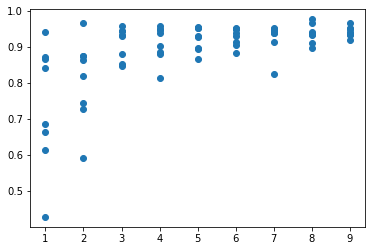

In [14]:
plt.scatter(ms.history.iloc[:,0], ms.history.score)

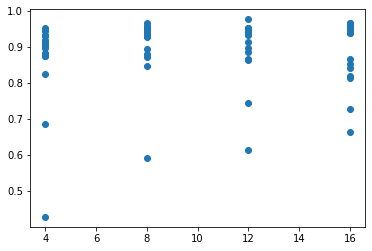

In [15]:
plt.scatter(ms.history.iloc[:,1], ms.history.score)

In [ ]:
plt.scatter(ms.history.iloc[:,0], ms.history.score)

In [10]:
ms.df

,n_estimators,max_depth,max_features,score
0,0.166667,0.833333,0.500000,0.818884
1,0.833333,0.833333,0.166667,0.941359
2,0.500000,0.166667,0.166667,0.931399
3,0.500000,0.500000,0.833333,0.952381
4,0.125000,0.875000,0.125000,0.818884
...,...,...,...,...
993,0.805556,0.861111,0.027778,0.941359
994,0.583333,0.027778,0.694444,0.905808
995,0.416667,0.416667,0.527778,0.957036
996,0.194444,0.472222,0.305556,0.590484


In [11]:
ms.previous_values

{"{'n_estimators': 2, 'max_depth': 16, 'max_features': 'log2'}": {'values': [{'n_estimators': 0.16666666666666666,
    'max_depth': 0.8333333333333333,
    'max_features': 0.5},
   {'n_estimators': 0.125, 'max_depth': 0.875, 'max_features': 0.125},
   {'n_estimators': 0.21428571428571427,
    'max_depth': 0.7857142857142856,
    'max_features': 0.21428571428571427},
   {'n_estimators': 0.125,
    'max_depth': 0.875,
    'max_features': 0.29166666666666663},
   {'n_estimators': 0.19230769230769232,
    'max_depth': 0.8076923076923077,
    'max_features': 0.038461538461538464},
   {'n_estimators': 0.11538461538461539,
    'max_depth': 0.9615384615384616,
    'max_features': 0.5},
   {'n_estimators': 0.17857142857142855,
    'max_depth': 0.8214285714285714,
    'max_features': 0.17857142857142855},
   {'n_estimators': 0.16666666666666669,
    'max_depth': 0.9666666666666667,
    'max_features': 0.23333333333333334},
   {'n_estimators': 0.16666666666666669,
    'max_depth': 0.9666666666666